In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__


'2.11.0'

In [2]:
path = '/content/drive/MyDrive/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [4]:
height , width = 128,128

In [5]:
images = []
classes = []

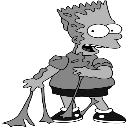

(16384,)
0


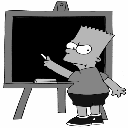

(16384,)
0


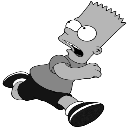

(16384,)
0


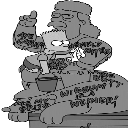

(16384,)
0


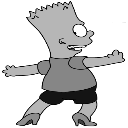

(16384,)
0


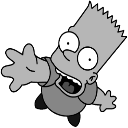

(16384,)
0


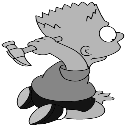

(16384,)
0


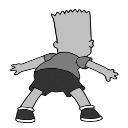

(16384,)
0


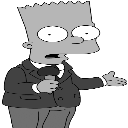

(16384,)
0


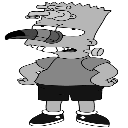

(16384,)
0


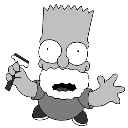

(16384,)
0


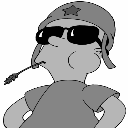

(16384,)
0


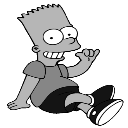

(16384,)
0


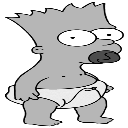

(16384,)
0


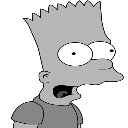

(16384,)
0


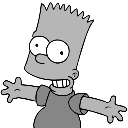

(16384,)
0


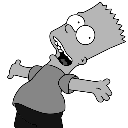

(16384,)
0


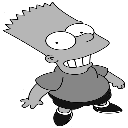

(16384,)
0


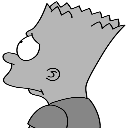

(16384,)
0


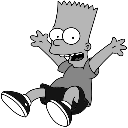

(16384,)
0


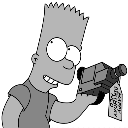

(16384,)
0


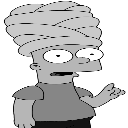

(16384,)
0


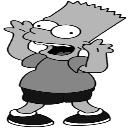

(16384,)
0


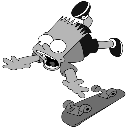

(16384,)
0


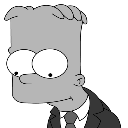

(16384,)
0


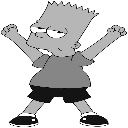

(16384,)
0


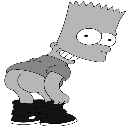

(16384,)
0


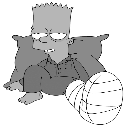

(16384,)
0


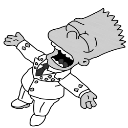

(16384,)
0


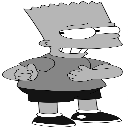

(16384,)
0


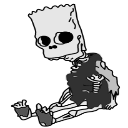

(16384,)
0


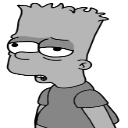

(16384,)
0


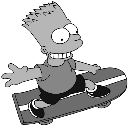

(16384,)
0


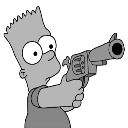

(16384,)
0


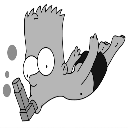

(16384,)
0


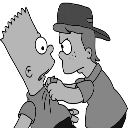

(16384,)
0


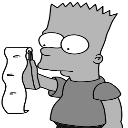

(16384,)
0


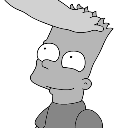

(16384,)
0


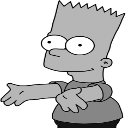

(16384,)
0


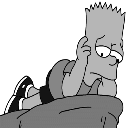

(16384,)
0


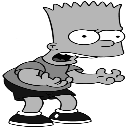

(16384,)
0


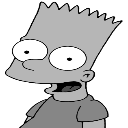

(16384,)
0


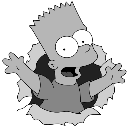

(16384,)
0


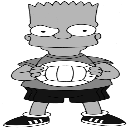

(16384,)
0


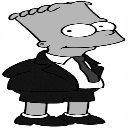

(16384,)
0


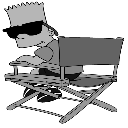

(16384,)
0


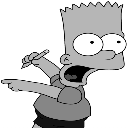

(16384,)
0


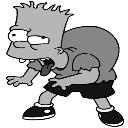

(16384,)
0


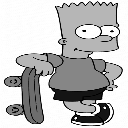

(16384,)
0


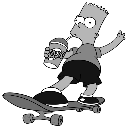

(16384,)
0


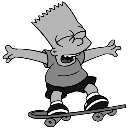

(16384,)
0


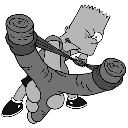

(16384,)
0


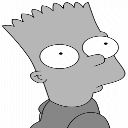

(16384,)
0


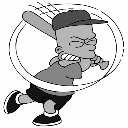

(16384,)
0


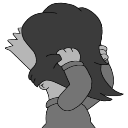

(16384,)
0


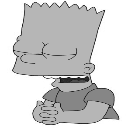

(16384,)
0


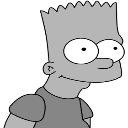

(16384,)
0


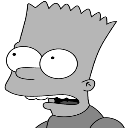

(16384,)
0


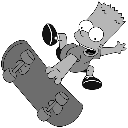

(16384,)
0


In [ ]:
for image_path in files:
  # print(image_path)
 try: 
  image = cv2.imread(image_path)
  (H,W) = image.shape[:2] 
 except: 
     continue
 image = cv2.resize(image, (width,height))   
 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 cv2_imshow(image)
 image = image.ravel()
 print(image.shape) 

 images.append(image)
 image_name = os.path.basename(os.path.normpath(image_path))

 if image_name.startswith('b'):
   class_name = 0
 else:
   class_name = 1  

 classes.append(class_name)
 print(class_name)  

In [ ]:
image.shape

In [ ]:
images

In [ ]:
classes

In [ ]:
X = np.asarray(images)
y = np.asarray(classes)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X

In [ ]:
y

In [ ]:
X[0].reshape(width,height).shape

In [ ]:
cv2_imshow(X[0].reshape(width,height))

In [ ]:
sns.countplot(y)

In [ ]:
np.unique(y,return_counts=True)

In [ ]:
X[0].max() , X[0].min()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X[0].max() , X[0].min()

In [ ]:
X[1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [32]:
#16384 -> 8193 -> 8193 -> 1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,),units=8193,activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193,activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))


In [33]:
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_3 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_4 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [34]:
network1.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [35]:
history = network1.fit(X_train,y_train,epochs=50)

Epoch 1/50
7/7 [==============================] - 14s 2s/step - loss: 106.5281 - accuracy: 0.5256
Epoch 2/50
7/7 [==============================] - 20s 3s/step - loss: 30.9646 - accuracy: 0.4651
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 9.1105 - accuracy: 0.5116
Epoch 4/50
7/7 [==============================] - 14s 2s/step - loss: 1.3153 - accuracy: 0.5395
Epoch 5/50
7/7 [==============================] - 13s 2s/step - loss: 0.6811 - accuracy: 0.6140
Epoch 6/50
7/7 [==============================] - 13s 2s/step - loss: 0.6444 - accuracy: 0.6000
Epoch 7/50
7/7 [==============================] - 13s 2s/step - loss: 0.6353 - accuracy: 0.6512
Epoch 8/50
7/7 [==============================] - 14s 2s/step - loss: 0.6419 - accuracy: 0.6233
Epoch 9/50
7/7 [==============================] - 13s 2s/step - loss: 0.5954 - accuracy: 0.6279
Epoch 10/50
7/7 [==============================] - 13s 2s/step - loss: 0.5661 - accuracy: 0.7023
Epoch 11/50
7/7 [===================

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

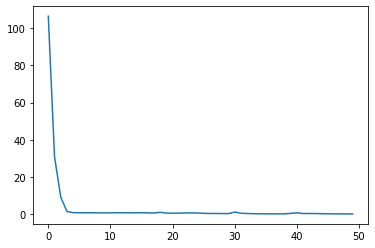

In [37]:
plt.plot(history.history['loss'])

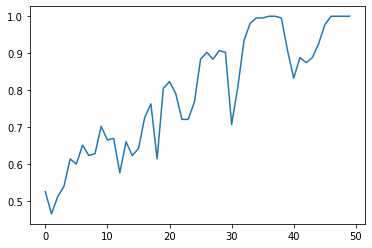

In [38]:
plt.plot(history.history['accuracy'])

In [39]:
X_test.shape

(54, 16384)

In [40]:
predictions = network1.predict(X_test)
predictions

2/2 [==============================] - 1s 198ms/step


array([[0.01361424],
       [0.9966192 ],
       [0.03592164],
       [0.0601241 ],
       [0.8358988 ],
       [0.02625069],
       [0.9971027 ],
       [0.9330426 ],
       [0.49505982],
       [0.9695872 ],
       [0.09950622],
       [0.9998713 ],
       [0.9064745 ],
       [0.753528  ],
       [0.1549696 ],
       [0.02081266],
       [0.0919202 ],
       [0.88958275],
       [0.02543763],
       [0.01170058],
       [0.00923133],
       [0.8181382 ],
       [0.01627341],
       [0.06778745],
       [0.08982281],
       [0.80017895],
       [0.01564641],
       [0.02914139],
       [0.35319734],
       [0.99101716],
       [0.38391382],
       [0.9988176 ],
       [0.841995  ],
       [0.00429252],
       [0.99969655],
       [0.01172403],
       [0.40126178],
       [0.01824097],
       [0.32048255],
       [0.01425757],
       [0.972299  ],
       [0.94622695],
       [0.04388167],
       [0.03536114],
       [0.01286273],
       [0.52939945],
       [0.967992  ],
       [0.023

In [41]:
# 0 - False - Bart
# 1 - True - Homer

In [43]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [44]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [46]:
accuracy_score(y_test,predictions)

0.7592592592592593

In [48]:
confusion_matrix(y_test,predictions)

array([[23,  5],
       [ 8, 18]])

In [49]:
model_json = network1.to_json()
with open('network1.json','w') as json_file:
   json_file.write(model_json)

In [50]:
from keras.models import save_model
network1_saved = save_model(network1,'weights1.hdf5')

In [51]:
with open('network1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model  

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_2_input"}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regulariz

In [52]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('/content/weights1.hdf5')
network1_loaded.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [53]:
network1_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_3 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_4 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [63]:
test_image = X_test[34]
test_image = scaler.inverse_transform(test_image.reshape(1,-1))

In [64]:
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

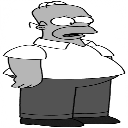

In [65]:
cv2_imshow(test_image.reshape(width,height))

In [66]:
if network1_loaded.predict(test_image)[0][0] < 0.5:
  print("Bart")
else:
  print('Homer')  

1/1 [==============================] - 0s 67ms/step
Homer
